# Food Manager Analysis
## Summary: Food Manager Analysis Report

**Study Group:** 5 individuals  
**Study Periods:**  
- **Baseline:** 4 weeks starting 9 March  
- **Trial:** 2 weeks starting 14 April  

---

## Method

The paricipants in this research were not randomly selected.
Households were asked to sign up to a study in food waste. The study involved recording food waste information, but in the later stages, using an application to plan and buy weekly food and cook the recipes selected from the Application. Participants were mostly drawn from neigbours who were prepared to change their meal planning / shopping habits during the study. 

This study had three phases.

### Phase 1 - baseline
- 4 weeks of food waste data submitted by participants.
- Data collected was total weight in grams of food wasted, and estimates of the percentage of that food waste that was composted and the percentage of that food waste that was inedible.  
- This data was collected via a google form and entries were made by the participants.
  
### Phase 2 - application implementation
- A cross platform "Food Manager" Application was developed using food waste reduction concepts based on a liturature review.
- Trial participants also took part in the implementation as testers
- Full details of the implementation of this application are available in the implementation report.

### Phase 3 - the trial of application
- 2 weeks of food waste data (same data as in Phase 1), plus shopping data, was collected in the Food Manager Application.
- The Phase 1 data (from google forms) and the Phase 3 data (downloaded from the application) form the data for this research. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid", palette="muted", font_scale=1.1)


# Pre-processing

In [2]:
# load baseline.csv from google sheets data
baseline = pd.read_csv("Weekly Food Waste Input Form (Responses) - Form Responses.csv", parse_dates=[0])
# rename columns
baseline.columns = [
    "timestamp", "person_id", "week_label", "total_waste_g",
    "inedible_percent", "composted_percent"
]
# format person_id as Pxx
baseline["person_id"] = baseline["person_id"].astype(int).apply("{:02d}".format)
baseline["person_id"] = "P" + baseline["person_id"]
# convert week_labels ('9 March 2025') to datetime
baseline["week_date"] = pd.to_datetime(baseline["week_label"], format="%d %B %Y")
# convert percentages from whole numbers to decimals
baseline["inedible_percent"] = baseline["inedible_percent"] / 100
baseline["composted_percent"] = baseline["composted_percent"] / 100
# add blank portions column (so it's the same format as the trial data)
baseline["portions"] = ""
# select the columns we want
baseline = baseline[["person_id", "week_date", "total_waste_g", "inedible_percent", "composted_percent", "portions"]]
# drop entries for person_id 6 because they dropped out before the trial"
baseline = baseline[baseline["person_id"] != "P06"]

# functions to calculate the weight of all elements recycled, indedible and composted
def calc_inedible_g(row):
    return row["total_waste_g"] * row["inedible_percent"]

def calc_composted_g(row):
    return row["total_waste_g"] * row["composted_percent"]

def calc_recycled_g(row):
    return row["total_waste_g"] - calc_composted_g(row)

# add new columns with the calcs
baseline["inedible_g"] = baseline.apply(calc_inedible_g, axis=1)
baseline["composted_g"] = baseline.apply(calc_composted_g, axis=1)
baseline["recycled_g"] = baseline.apply(calc_recycled_g, axis=1)
# add food bought col to match trial data
baseline["food_bought_g"] = 0
# check format
baseline


,person_id,week_date,total_waste_g,inedible_percent,composted_percent,portions,inedible_g,composted_g,recycled_g,food_bought_g
0,P01,2025-03-09,1324,0.63,0.00,,834.12,0.00,1324.00,0
1,P01,2025-03-23,1536,0.50,0.00,,768.00,0.00,1536.00,0
2,P01,2025-03-30,1410,0.60,0.00,,846.00,0.00,1410.00,0
3,P01,2025-03-16,1493,0.56,0.00,,836.08,0.00,1493.00,0
4,P02,2025-03-09,938,0.60,0.00,,562.80,0.00,938.00,0
5,P02,2025-03-16,1054,0.53,0.00,,558.62,0.00,1054.00,0
6,P02,2025-03-23,1002,0.56,0.00,,561.12,0.00,1002.00,0
7,P02,2025-03-30,1036,0.51,0.00,,528.36,0.00,1036.00,0
8,P03,2025-03-09,452,0.62,0.60,,280.24,271.20,180.80,0
9,P03,2025-03-16,439,0.55,0.68,,241.45,298.52,140.48,0


In [3]:

# load trialdata downloaded from admin app
trial = pd.read_csv("weeklySummary.csv", parse_dates=["week"])
trial

# Filter emails ending with @trial.com
trial = trial[trial["person_id"].str.endswith("@trial.com")].copy()

# Extract numeric part of person_id and reformat to PXX
trial["person_id"] = trial["person_id"].str.extract(r"(\d+)")[0]
trial["person_id"] = trial["person_id"].astype(int)
trial["person_id"] = trial["person_id"].apply("{:02d}".format)
trial["person_id"] = "P" + trial["person_id"]

# Compute inedible_percent = inedible_g / total_waste_g
def compute_inedible_percent(row):
    if pd.notnull(row["total_waste_g"]) and row["total_waste_g"] > 0:
        return row["inedible_g"] / row["total_waste_g"]
    return 0

def compute_composted_percent(row):
    if pd.notnull(row["total_waste_g"]) and row["total_waste_g"] > 0:
        return row["composted_g"] / row["total_waste_g"]
    return 0

def compute_recycled_g(row):
    if pd.notnull(row["total_waste_g"]) and pd.notnull(row["composted_g"]):
        return row["total_waste_g"] - row["composted_g"]
    return 0

trial["inedible_percent"] = trial.apply(compute_inedible_percent, axis=1)
trial["composted_percent"] = trial.apply(compute_composted_percent, axis=1)
trial["recycled_g"] = trial.apply(compute_recycled_g, axis=1)

trial["inedible_percent"] = trial.apply(compute_inedible_percent, axis=1)
trial["composted_percent"] = trial.apply(compute_composted_percent, axis=1)

# Rename and reorder
trial = trial.rename(columns={"week": "week_date"})

# Ensure food_bought_g is at the end (retain if already exists)
if "food_bought_g" not in trial.columns:
    trial["food_bought_g"] = ""

# Final column order
trial = trial[[
    "person_id", "week_date", "total_waste_g", "inedible_percent", "composted_percent",
    "portions", "inedible_g", "composted_g", "recycled_g", "food_bought_g"
]]

trial

,person_id,week_date,total_waste_g,inedible_percent,composted_percent,portions,inedible_g,composted_g,recycled_g,food_bought_g
0,P05,2025-04-13,650,0.59,0.00,20,383.50,0.00,650.00,9608.6
1,P05,2025-04-20,534,0.70,0.00,20,373.80,0.00,534.00,6406.0
2,P01,2025-04-13,1080,0.70,0.00,36,756.00,0.00,1080.00,19410.5
3,P01,2025-04-20,1156,0.67,0.00,36,774.52,0.00,1156.00,13941.0
4,P04,2025-04-13,790,0.65,0.61,23,513.50,481.90,308.10,13231.6
5,P04,2025-04-20,612,0.60,0.57,18,367.20,348.84,263.16,5448.0
6,P02,2025-04-13,1180,0.60,0.00,30,708.00,0.00,1180.00,16172.0
7,P02,2025-04-20,784,0.64,0.00,24,501.76,0.00,784.00,8121.0
16,P03,2025-04-13,365,0.66,0.68,12,240.90,248.20,116.80,9076.6
17,P03,2025-04-20,402,0.66,0.64,13,265.32,257.28,144.72,3792.0


In [4]:

# identify the two data sets before combining
baseline["phase"] = "baseline"
trial["phase"] = "trial"
combined = pd.concat([baseline, trial], ignore_index=True)
combined


,person_id,week_date,total_waste_g,inedible_percent,composted_percent,portions,inedible_g,composted_g,recycled_g,food_bought_g,phase
0,P01,2025-03-09,1324,0.63,0.00,,834.12,0.00,1324.00,0.0,baseline
1,P01,2025-03-23,1536,0.50,0.00,,768.00,0.00,1536.00,0.0,baseline
2,P01,2025-03-30,1410,0.60,0.00,,846.00,0.00,1410.00,0.0,baseline
3,P01,2025-03-16,1493,0.56,0.00,,836.08,0.00,1493.00,0.0,baseline
4,P02,2025-03-09,938,0.60,0.00,,562.80,0.00,938.00,0.0,baseline
5,P02,2025-03-16,1054,0.53,0.00,,558.62,0.00,1054.00,0.0,baseline
6,P02,2025-03-23,1002,0.56,0.00,,561.12,0.00,1002.00,0.0,baseline
7,P02,2025-03-30,1036,0.51,0.00,,528.36,0.00,1036.00,0.0,baseline
8,P03,2025-03-09,452,0.62,0.60,,280.24,271.20,180.80,0.0,baseline
9,P03,2025-03-16,439,0.55,0.68,,241.45,298.52,140.48,0.0,baseline


In [ ]:
# manage portions google form data doesn't have portions
# only update portions if they are currently 0 or blank
def update_portions(row):
    if row["portions"] == 0 or row["portions"] == "" or pd.isna(row["portions"]):
        if row["person_id"] in portions_map:
            return portions_map[row["person_id"]]
    return row["portions"]

# base portions on number of people and number of days
portions_map = {
    "P01": 42,  # 5pl x 7 days
    "P02": 28,  # 4 x 7
    "P03": 14,  # 2 x 7
    "P04": 21,  # 3 x 7
    "P05": 20   # 4 x 5 - only cooks 5/7 days
}

combined["portions"] = combined.apply(update_portions, axis=1)

# add edible_percent and waste_per_portion for later analysis
combined["edible_percent"] = 1 - combined["inedible_percent"]
combined["waste_per_portion"] = combined["total_waste_g"] / combined["portions"]
combined.loc[combined["portions"] == 0, "waste_per_portion"] = None 



# Data Summary

In [6]:
print('Weeks of data per household in each phase\n',combined.groupby(["person_id", "phase"]).size().unstack(fill_value=0)
)
print('\nPortion Count Per phase:',combined.groupby("phase")["portions"].sum())

print('\nWeeks of Waste Data per household in each phase',combined.groupby("phase")["waste_per_portion"].describe())

print('\nVariation in Waste per portion',combined.groupby("phase")["waste_per_portion"].describe()
)

Weeks of data per household in each phase
 phase      baseline  trial
person_id                 
P01               4      2
P02               4      2
P03               4      2
P04               4      2
P05               4      2

Portion Count Per phase: phase
baseline    500
trial       232
Name: portions, dtype: int64

Weeks of Waste Data per household in each phase           count       mean       std   min        25%        50%        75%  \
phase                                                                         
baseline   20.0  35.415714  4.202209  29.0  32.446429  35.666667  37.160714   
trial      10.0  32.299868  3.314184  26.7  30.543269  32.305556  33.666667   

                max  
phase                
baseline  45.523810  
trial     39.333333  

Variation in Waste per portion           count       mean       std   min        25%        50%        75%  \
phase                                                                         
baseline   20.0  35.415714  4.2

# Data Analaysis and Findings

### Key Changes: Baseline vs Trial

- Median total weekly waste decreased from 844.5 g in the baseline to 717.0 g during the trial, a reduction of about 15%.

- The edible portion of waste dropped from 43% to 35%, suggesting less food spoilage.

- Composted share remained consistent, with a small decrease from 26% to 25%.

- Average waste per portion improved from 35.4 g to 32.3 g, indicating more efficient food usage overall

      phase  Median Waste (g)  Avg Edible Share  Avg Composted Share  \
0  baseline             844.5              0.43                 0.26   
1     trial             717.0              0.35                 0.25   

   Avg Waste per Portion  
0                  35.42  
1                  32.30  


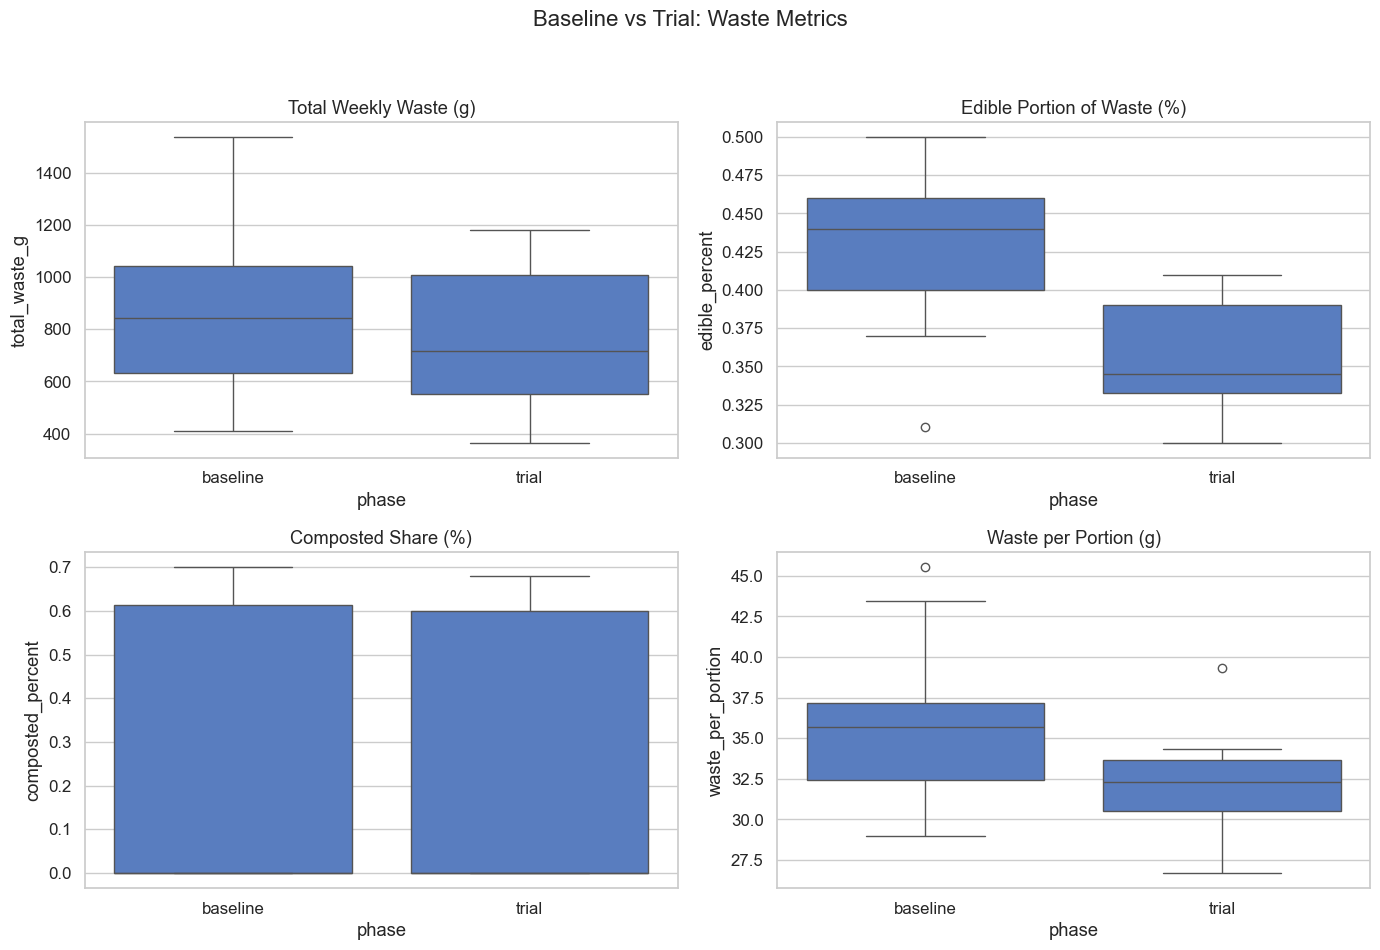

In [ ]:
# summary comparison stats
# group by phase and get median values
summary_stats = combined.groupby("phase").agg({
    "total_waste_g": "median",
    "edible_percent": "mean",
    "composted_percent": "mean",
    "waste_per_portion": "mean"
}).rename(columns={
    "total_waste_g": "Median Waste (g)",
    "edible_percent": "Avg Edible Share",
    "composted_percent": "Avg Composted Share",
    "waste_per_portion": "Avg Waste per Portion"
}).round(2).reset_index()

print(summary_stats)


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Baseline vs Trial: Waste Metrics", fontsize=16)

# total waste
sns.boxplot(data=combined, x="phase", y="total_waste_g", ax=axes[0, 0])
axes[0, 0].set_title("Total Weekly Waste (g)")

# edible Percent
sns.boxplot(data=combined, x="phase", y="edible_percent", ax=axes[0, 1])
axes[0, 1].set_title("Edible Portion of Waste (%)")

# composted percent
sns.boxplot(data=combined, x="phase", y="composted_percent", ax=axes[1, 0])
axes[1, 0].set_title("Composted Share (%)")

# waste per portion
sns.boxplot(data=combined, x="phase", y="waste_per_portion", ax=axes[1, 1])
axes[1, 1].set_title("Waste per Portion (g)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### 2. Alignment with UK Waste Benchmark

- The UK Average for Household Food Waste: 16% of food bought.

- The group average was 7.77% which is significantly below the national benchmark.

- All 5 participants are below the UK average

In [8]:
# calculate waste % per person (only where food_bought_g > 0)
combined["waste_percent"] = (combined["total_waste_g"] / combined["food_bought_g"]) * 100
combined.loc[combined["food_bought_g"] == 0, "waste_percent"] = None  

# group by person and calc average waste percent
waste_by_person = combined.groupby("person_id").agg(
    avg_waste_percent=("waste_percent", "mean")
).reset_index()

# compare against UK benchmark
uk_benchmark = 16.0
below_benchmark = (waste_by_person["avg_waste_percent"] < uk_benchmark).sum()
total_people = waste_by_person.shape[0]
group_avg = waste_by_person["avg_waste_percent"].mean().round(2)

waste_by_person

,person_id,avg_waste_percent
0,P01,6.928043
1,P02,8.475273
2,P03,7.311298
3,P04,8.602018
4,P05,7.550354


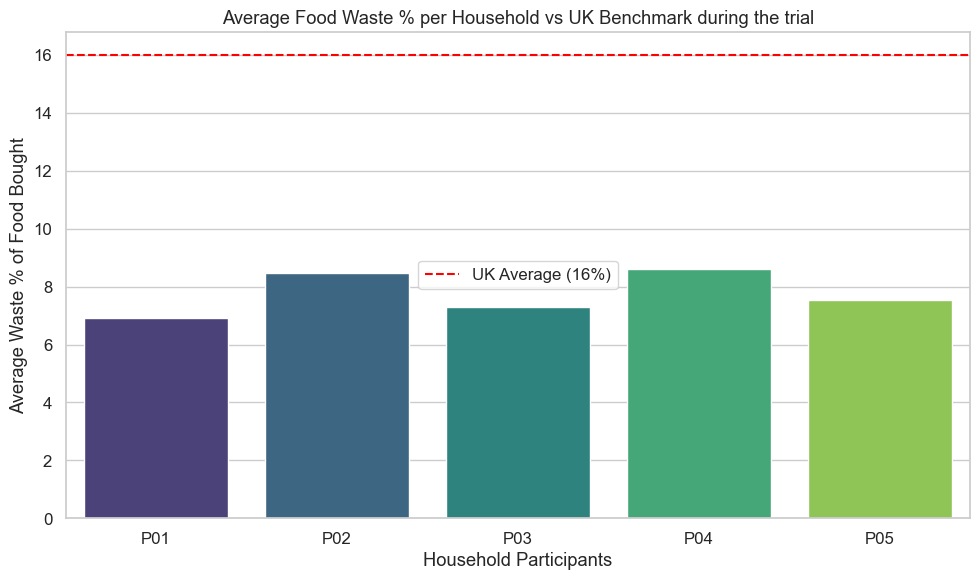

In [12]:
# plot waste % with UK benchmark
uk_benchmark = 16.0
plt.figure(figsize=(10, 6))
sns.barplot(data=waste_by_person, x="person_id", y="avg_waste_percent", hue="person_id",
    palette="viridis",
    legend=False)
plt.axhline(uk_benchmark, color='red', linestyle='--', label='UK Average (16%)')

plt.title("Average Food Waste % per Household vs UK Benchmark during the trial")
plt.ylabel("Average Waste % of Food Bought")
plt.xlabel("Household Participants")
plt.legend()
plt.tight_layout()
plt.show()

### 3. Waste Composition

- Most participants have 56% to 62% inedible waste on average.
- A higher inedible percentage typically indicates better food use, as it reflects less avoidable waste (e.g., peels, bones rather than leftovers).

In [10]:
# calculate avg inedible percent per person
composition_summary = combined.groupby("person_id").agg(
    avg_inedible_percent=("inedible_percent", "mean")
).reset_index().round(2)

# min and max for commentary
min_inedible = composition_summary["avg_inedible_percent"].min()
max_inedible = composition_summary["avg_inedible_percent"].max()

print(composition_summary)
print(min_inedible)
print(max_inedible)



  person_id  avg_inedible_percent
0       P01                  0.61
1       P02                  0.57
2       P03                  0.62
3       P04                  0.56
4       P05                  0.62
0.56
0.62


## Conclusion

This small-scale trial showed promising signs of improved food waste practices among participants.  
- Median total weekly waste decreased from 844 g to 717 g, a 15% reduction.
- The average edible waste share dropped from 43% to 35%, suggesting a meaningful reduction in avoidable waste.
- Waste per portion** decreased from 35.4 g to 32.3 g, reflecting more efficient food use.
- All participants stayed well below the UK average of 16% food waste, with individual averages ranging from 6.9% to 8.6%.
- The inedible portion of waste remained high (56–62%), suggesting most discarded food was unavoidable (e.g., peels, bones).

During the trial phase, participants used a the Food Manager App, which was not part of the baseline phase.  
This likely contributed to more intentional shopping and food usage, helping reduce avoidable waste.

In this trial, use of the Food Manager App contributed towards a reduction in household food waste.


## Limitations and Considerations

- This study involved a small number of participants, limiting the generalisability of results.
- Data was self-reported, introducing the potential for estimation bias.
- There were only two weeks of trial data, which limits the generalisability of the results.
- The recipes in the app were new to the participants which may have required them to purchase items they didn't already have in stock, and so decreasing their food waste vs food bought percentage.
- Several participants were already composting, indicating prior awareness of food waste and possibly reducing the observable impact of the trial.
- The number of portions varied during the trial due to bank holidays and inconsistent meal provision, affecting comparability.
- Food bought was based on the smartlist in the application and although that would have represented most of the food bought in a week, it will not have represented all bought food.

These factors should be considered when interpreting the findings.
